In [5]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [6]:

df = pd.read_csv('Treasury Squeeze test - DS1.csv',header=None)
df.shape


(901, 12)

In [7]:
#drop the first row
a=df.drop(df.index[0])



In [8]:
#drop the first column of df
b=a.drop(df.index[0], axis=1)


In [9]:
#drop second column of df 
c=b.drop(b.index[0],axis=1)



In [10]:
#convert column 11 to integer
c[11]=(c[11] == 'TRUE').astype(int)


In [11]:
X=c.drop(c.index[10],axis=1).values
X.shape


(900, 9)

In [12]:
y=c[11].values



In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [15]:
#knn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics 
import numpy as np
import pandas as pd



In [16]:
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    print((k,knn.score(X_test, y_test)))
    

(1, 0.6074074074074074)
(2, 0.6148148148148148)
(3, 0.6148148148148148)
(4, 0.6370370370370371)
(5, 0.6296296296296297)
(6, 0.6444444444444445)
(7, 0.6222222222222222)
(8, 0.6407407407407407)
(9, 0.6)
(10, 0.6407407407407407)
(11, 0.6370370370370371)
(12, 0.6370370370370371)
(13, 0.6518518518518519)
(14, 0.6370370370370371)
(15, 0.6296296296296297)
(16, 0.6370370370370371)
(17, 0.6222222222222222)
(18, 0.6518518518518519)
(19, 0.662962962962963)
(20, 0.6370370370370371)
(21, 0.6555555555555556)
(22, 0.6370370370370371)
(23, 0.6481481481481481)
(24, 0.6444444444444445)
(25, 0.6444444444444445)


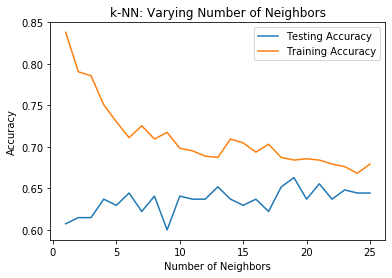

In [17]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 26)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
#we can see the largest testing accuracy was in k = 19

In [18]:
##Building a decision tree¶
#select the first 2 columns as the variables to predict squeeze

In [19]:
#change the type of x from str to int
c[0:900]=c[0:900].astype(int)
c.values

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 0, 1]])

In [20]:
c.shape

(900, 10)

In [21]:
X=c.drop(c.index[10],axis=1).values
X

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 1, 0]])

In [22]:
X.shape

(900, 9)

In [23]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [39]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


In [40]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.64


In [44]:
d_range = range(1,10)
for d in d_range:
    # Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
    dt = DecisionTreeClassifier(max_depth=d, random_state=0)

# Fit dt to the training set
    dt.fit(X_train, y_train)

# Predict test set labels
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test set accuracy: {:.2f}".format(acc))
    
    

    

Test set accuracy: 0.60
Test set accuracy: 0.63
Test set accuracy: 0.64
Test set accuracy: 0.68
Test set accuracy: 0.67
Test set accuracy: 0.61
Test set accuracy: 0.62
Test set accuracy: 0.59
Test set accuracy: 0.57


In [ ]:
#max_depth = 4 can have best accuracy score

In [ ]:
print("My name is Xuehui Chao")
print("My NetID is: xuehuic2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")